# README


# Mortgage Approval Prediction Using Neural Networks


## Authors
### Bryce Hinkley

Github
- [@Ouroborosrex](https://www.github.com/Ouroborosrex)

Email
- bryce.hinkley @ my.utsa.com

#### Contributions

- Created model architecture
- Aquired dataset
- Created data cleaning code (encoding, regularization, choosing feautres)
- Data visualization
- Conducted experimentation (comparision of different feautres)
- Wrote research paper abstract, related works, methodology, metrics, results, future considerations, conclusion, and references
- Created slides for presentation
- Created documentation, such as comments, within code

### Alex Van Nimwegen

#### Contributions
- Created README
- Wrote introduction in research paper

## Introduction

Given the high levels of stress and uncertainty that inexperienced families often experience when applying for a mortgage loan, our team saw an opportunity to develop an app that could help make predictions that are unbiased and not influenced by any particular financial institution.
To this end, we have built a deep neural network model designed to accurately predict mortgage loan approvals. The primary objective of our project is to train this model to provide accurate and reliable predictions, without any undue influence from external factors.

While our current implementation is focused solely on building the predictive model, our ultimate goal is to develop an end-to-end application that will allow users to input their personal information and receive a prediction as to whether or not they are likely to qualify for a mortgage loan. We are committed to refining and improving our model over time, with the aim of creating a tool that is truly useful and accessible to all.

## Features

Our project incorporates multiple models to evaluate which data is most relevant for accurately predicting mortgage loan approvals. The first model incorporates both macro and micro economic data, while the second model removes much of the macroeconomic information. We are currently working on a third model that aims to remove any potential biases and provide even more accurate predictions. 

The project is written in Python and has been specifically set up to run in Google Colab. 

Our project also includes features to address common challenges in mortgage lending, such as data imbalance and irrelevant data columns. We have implemented strategies to correct for dataset imbalance and automatically remove columns that are not relevant to the project, streamlining the data preparation process and allowing for accurate model training.

## Getting Started

As the project is currently only written to be used in a python notebook, the project is intended to be opened in Google Colab and have each cell to be run from top to bottom.

In order to aquire the data, please visit consumerfinance.gov and get the hmda data found [here](https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=nationwide&records=all-records&field_descriptions=codes).

Make sure that you have the options as follows:
- Nationwide
- 2017
- All records
- HDMA codes only
So that you are able to resemble the dataset that we used. We added them to a public Google Drive and then used !gdown in our Jupyter file to aquire the data. However, feel free to have the data be aquired as you please so that you are able to add it into the DataFrame from a .csv file as shown in the code.

## Organization
Imported libraries required for the project are at the top.
Then the dataset is imported using !gdown and inserted into a pandas dataframe.
There are many cells that are just used to show what is happening to the data in each step, such as displaying columns in the data.
The data is then undersampled and split into training, testing, and validation sets.
Shuffled batches are created and layers are normalized.
After normalization, the model is created, compiled, and visualized.
Next the results of the model are displayed.
A second model is created, compiled, and its results are displayed for comparison.
A third model for removing bias data is below this but it is still being worked on.

## References

[1] Sirignano, J., Sadhwani, A., & Giesecke, K. (2016). Deep learning for mortgage risk. arXiv preprint arXiv:1607.02470.

[2] Weytjens, Hans, and Jochen De Weerdt. "Process outcome prediction: CNN vs. LSTM (with attention)." Business Process Management Workshops: BPM 2020 International Workshops, Seville, Spain, September 13–18, 2020, Revised Selected Papers 18. Springer International Publishing, 2020.

[3] Li, Meixuan, Chun Yan, and Wei Liu. "The network loan risk prediction model based on Convolutional neural network and Stacking fusion model." Applied Soft Computing 113 (2021): 107961.

[4] Kvamme, Håvard, et al. "Predicting mortgage default using convolutional neural networks." Expert Systems with Applications 102 (2018): 207-217.

[5] “Download HMDA data | Consumer Financial Protection Bureau,” Consumer Financial Protection Bureau. https://www.consumerfinance.gov/data-research/hmda/historic-data/



# Data and Imports

Import libraries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from imblearn.under_sampling import RandomUnderSampler

Import Data

In [ ]:
#This will download the large dataset into your colab enviroment so that you don't need to have it loaded
!gdown --id 1icrSRu6L_GbuXheuORcoOFtalK9OLlSq

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1icrSRu6L_GbuXheuORcoOFtalK9OLlSq
To: /content/hmda_2017_nationwide_all-records_codes.csv
100% 1.79G/1.79G [00:08<00:00, 220MB/s]


In [ ]:
# Adjust the data recieved by modifying the lambda statement
df = pd.read_csv('hmda_2017_nationwide_all-records_codes.csv',skiprows=lambda x: (x % 33) != 0)

print(df.head())

   as_of_year respondent_id  agency_code  loan_type  property_type  \
0        2017    05-0402708            7          1              1   
1        2017    0000233031            9          1              1   
2        2017    0000852320            9          1              1   
3        2017    38-2750395            7          1              1   
4        2017    38-2799035            7          2              1   

   loan_purpose  owner_occupancy  loan_amount_000s  preapproval  action_taken  \
0             3                1             139.0            3             1   
1             2                1               3.0            3             3   
2             3                1             230.0            3             3   
3             3                1              94.0            3             1   
4             1                1             118.0            3             6   

   ...  lien_status  edit_status  sequence_number  population  \
0  ...            1        

All of the column names from the dataset

['as_of_year', 'respondent_id', 'agency_code', 'loan_type',
       'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'action_taken', 'msamd', 'state_code', 'county_code',
       'census_tract_number', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'applicant_race_2', 'applicant_race_3',
       'applicant_race_4', 'applicant_race_5', 'co_applicant_race_1',
       'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4',
       'co_applicant_race_5', 'applicant_sex', 'co_applicant_sex',
       'applicant_income_000s', 'purchaser_type', 'denial_reason_1',
       'denial_reason_2', 'denial_reason_3', 'rate_spread', 'hoepa_status',
       'lien_status', 'edit_status', 'sequence_number', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'application_date_indicator']

In [ ]:
# This is just the output of all of the values for the dataset
df.columns

Index(['as_of_year', 'respondent_id', 'agency_code', 'loan_type',
       'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'action_taken', 'msamd', 'state_code', 'county_code',
       'census_tract_number', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'applicant_race_2', 'applicant_race_3',
       'applicant_race_4', 'applicant_race_5', 'co_applicant_race_1',
       'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4',
       'co_applicant_race_5', 'applicant_sex', 'co_applicant_sex',
       'applicant_income_000s', 'purchaser_type', 'denial_reason_1',
       'denial_reason_2', 'denial_reason_3', 'rate_spread', 'hoepa_status',
       'lien_status', 'edit_status', 'sequence_number', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'application_date_indicator'],
      dtyp

In [ ]:
# Pick only the columns that are necessary for the model.
df = df[['agency_code', 'loan_type',
       'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s',
       'preapproval','action_taken', 'state_code', 'county_code',
       'census_tract_number', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'co_applicant_race_1',
       'applicant_sex', 'co_applicant_sex',
       'applicant_income_000s', 'purchaser_type', 'hoepa_status',
       'lien_status', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units']]

# Two mapping sets to take the 3 and the 1 in the action_taken column.
# 1 and 3 are the values that we are wanting to predict from the dataset.
f1 = df['action_taken']==3.0
f2 = df['action_taken']==1.0

# We will now drop any values that are not 1 or 3 in the dataset and remove the missing values
df = df.where(f1 | f2)
df = df.dropna(how='any')

# We will now replace the 3 with a 0 to indicate a rejection and a 1 in the 1 values to indicate an approval
df['target'] = np.where(df['action_taken']==3.0, 0, 1)
df = df.drop(columns=['action_taken'])
df = df.reset_index()
df = df.astype('int64')

# Separate the features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Recombine the features and target variable
df = pd.concat([X_resampled, y_resampled], axis=1)

<ipython-input-5-564d52bc1f0b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = np.where(df['action_taken']==3.0, 0, 1)


In [ ]:
# Verify that the target class has been undersampled
df['target'].describe()

count    112736.000000
mean          0.500000
std           0.500002
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: target, dtype: float64

In [ ]:
# Create train, validation, and testing samples
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

90188 training examples
11274 validation examples
11274 test examples


In [ ]:
# Check for any missing values
nan_counts = df.isna().sum()
print(nan_counts)
print(df.dtypes)

index                             0
agency_code                       0
loan_type                         0
property_type                     0
loan_purpose                      0
owner_occupancy                   0
loan_amount_000s                  0
preapproval                       0
state_code                        0
county_code                       0
census_tract_number               0
applicant_ethnicity               0
co_applicant_ethnicity            0
applicant_race_1                  0
co_applicant_race_1               0
applicant_sex                     0
co_applicant_sex                  0
applicant_income_000s             0
purchaser_type                    0
hoepa_status                      0
lien_status                       0
population                        0
minority_population               0
hud_median_family_income          0
tract_to_msamd_income             0
number_of_owner_occupied_units    0
number_of_1_to_4_family_units     0
target                      

# Keras

Note: If you were working with a very large CSV file (so large that it does not fit into memory), you would use the `tf.data` API to read it from disk directly.

In [ ]:
"""
 The df_to_dataset function converts a pandas DataFrame to a TensorFlow Dataset object for machine learning.
 It reshapes the data into a dictionary of tf.Tensor objects, shuffles the data,
 and batches it based on the specified batch size before returning the Dataset object.
 
"""

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

## Apply the Keras preprocessing layers



### Numerical columns


In [ ]:
"""
 This code defines a function that creates a normalization layer for a specified feature in a dataset,
 learns the feature's statistics, and returns the resulting normalization layer.
 
"""

def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

Note: If you have many numeric features (hundreds, or more), it is more efficient to concatenate them first and use a single `tf.keras.layers.Normalization` layer.

### Categorical columns


Another utility function that returns a layer which maps values from a vocabulary to integer indices and multi-hot encodes the features.

In [ ]:
"""
 This code defines a function that creates a layer for encoding categorical features in a dataset by mapping
 the categories to integer indices, adapting the set of possible values to a fixed integer index,
 and encoding the indices as a one-hot encoded vector.

"""

def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [ ]:
"""
This code creates TensorFlow Dataset objects for training, validation,
and test sets using the df_to_dataset function with a specified batch size and shuffling behavior.

"""

batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

<ipython-input-9-2962e0a7a072>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
<ipython-input-9-2962e0a7a072>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
<ipython-input-9-2962e0a7a072>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [ ]:
"""
 This code creates input and encoding layers for a set of numerical features,
 applies normalization to each feature using the get_normalization_layer function,
 and adds them to lists for later use in a Keras model.
 
"""

all_inputs = []
encoded_features = []

# Numerical features.
for header in ['loan_amount_000s','census_tract_number','applicant_income_000s', 'population','hud_median_family_income','number_of_1_to_4_family_units','minority_population','number_of_owner_occupied_units','tract_to_msamd_income']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

Repeat the same step for the string categorical values:

In [ ]:
"""
This code creates input and encoding layers for a set of categorical features,
applies categorical encoding to each feature using the get_category_encoding_layer function,
and adds them to lists for later use in a Keras model.

"""

categorical_cols = ['property_type', 'agency_code', 'loan_type', 'loan_purpose', 'preapproval',
                    'state_code', 'county_code', 'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
                    'co_applicant_race_1','applicant_sex','co_applicant_sex','purchaser_type','hoepa_status',
                    'lien_status']

for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='int64',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

## Create, compile, and train the model


In [ ]:
# all_features = tf.keras.layers.concatenate(encoded_features)
# x = tf.keras.layers.Dense(16, activation="relu")(all_features)
# x = tf.keras.layers.Dense(32, activation="relu")(all_features)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(64, activation="relu")(all_features)
# x = tf.keras.layers.Dropout(0.5)(x)
# output = tf.keras.layers.Dense(1)(x)

# model = tf.keras.Model(all_inputs, output)

In [ ]:
# all_features = tf.keras.layers.concatenate(encoded_features)
# x = tf.keras.layers.Dense(256, activation="relu")(all_features)
# x = tf.keras.layers.Dropout(0.3)(x)
# x = tf.keras.layers.Dense(256, activation="relu")(all_features)
# x = tf.keras.layers.Dropout(0.3)(x)
# x = tf.keras.layers.Dense(256, activation="relu")(all_features)
# x = tf.keras.layers.Dropout(0.3)(x)

# output = tf.keras.layers.Dense(1)(x)

# model = tf.keras.Model(all_inputs, output)

In [ ]:
# all_features = tf.keras.layers.concatenate(encoded_features)
# x = tf.keras.layers.Dense(32, activation="relu")(all_features)
# x = tf.keras.layers.Dropout(0.5)(x)
# output = tf.keras.layers.Dense(1)(x)

# model = tf.keras.Model(all_inputs, output)

In [ ]:
"""
This code creates a Keras model by concatenating the encoded numerical and categorical features,
adding several dense layers with different activation functions and a dropout layer to prevent overfitting,
and finally adding an output layer with a linear activation function.

"""

# Add two dense layers with different number of units and activation functions
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(512, activation="relu")(all_features)
x = tf.keras.layers.Dense(256, activation="tanh")(x)

# Add dropout layers to prevent overfitting
x = tf.keras.layers.Dropout(0.5)(x)

# Add another dense layer
x = tf.keras.layers.Dense(128, activation="relu")(x)

# Add a final dropout layer
x = tf.keras.layers.Dropout(0.3)(x)

# Output layer with a linear activation
output = tf.keras.layers.Dense(1)(x)

# Create the model
model = tf.keras.Model(all_inputs, output)

Configure the model with Keras `Model.compile`:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True),
              metrics=["accuracy","FalsePositives","TruePositives","FalseNegatives"])

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.MeanSquaredError(),
#               metrics=["accuracy","FalsePositives","TruePositives","FalseNegatives"])

In [ ]:
# Prints a summary of the model layers contents and their names
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 property_type (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 agency_code (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 loan_type (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 loan_purpose (InputLayer)      [(None, 1)]          0           []                               
                                                                                              

Let's visualize the connectivity graph:


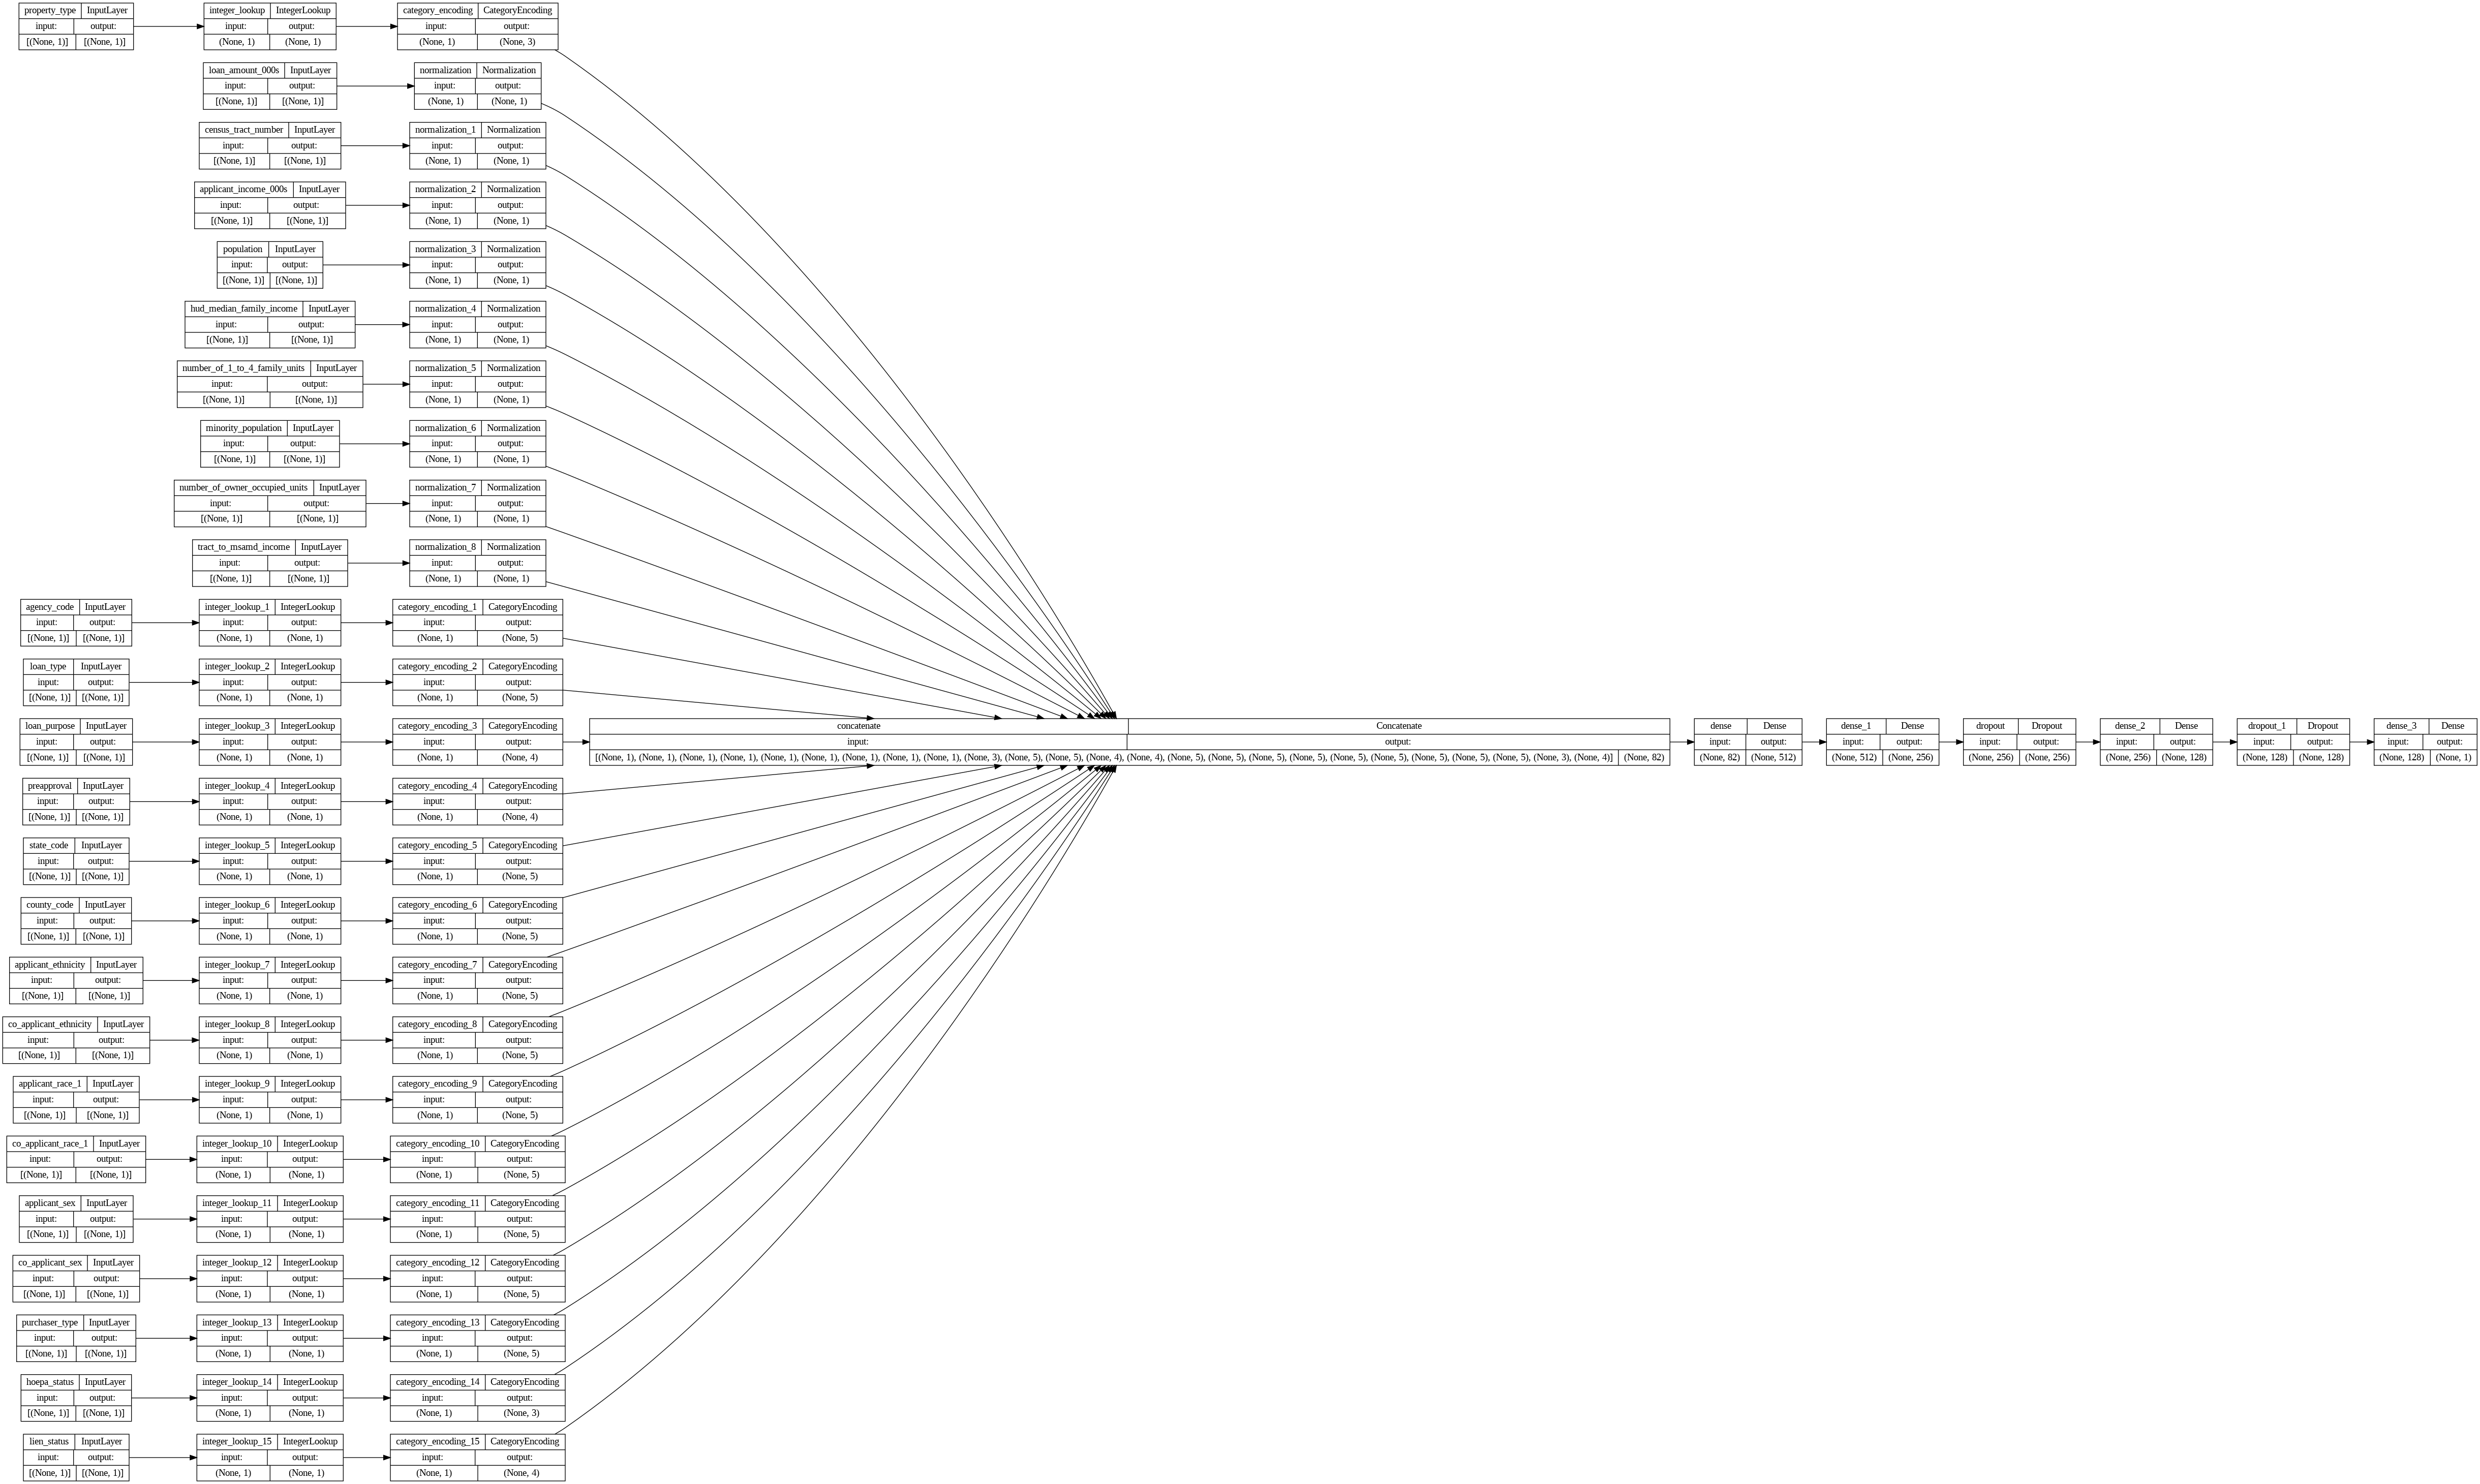

In [ ]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Next, train and test the model:

In [ ]:
model.fit(train_ds, epochs=25, validation_data=val_ds, batch_size=50)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['index', 'owner_occupancy', 'target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


353/353 [==============================] - 10s 16ms/step - loss: 0.0757 - accuracy: 0.8577 - false_positives: 349.0000 - true_positives: 32695.0000 - false_negatives: 12483.0000 - val_loss: 0.0699 - val_accuracy: 0.8691 - val_false_positives: 6.0000 - val_true_positives: 4126.0000 - val_false_negatives: 1470.0000
Epoch 2/25
353/353 [==============================] - 6s 13ms/step - loss: 0.0676 - accuracy: 0.8735 - false_positives: 137.0000 - true_positives: 33910.0000 - false_negatives: 11268.0000 - val_loss: 0.0690 - val_accuracy: 0.8664 - val_false_positives: 1.0000 - val_true_positives: 4091.0000 - val_false_negatives: 1505.0000
Epoch 3/25
353/353 [==============================] - 7s 15ms/step - loss: 0.0666 - accuracy: 0.8735 - false_positives: 110.0000 - true_positives: 33883.0000 - false_negatives: 11295.0000 - val_loss: 0.0680 - val_accuracy: 0.8702 - val_false_positives: 15.0000 - val_true_positives: 4148.0000 - val_false_negatives: 1448.0000
Epoch 4/25
353/353 [==============

In [ ]:
model.save_weights('my_model_weights', save_format='tf')


Now lets check the results of our model 

In [ ]:
def plot_roc_auc(y_test,y_pred,stre):
  # calculate fpr and tpr
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  # calculate AUC score
  auc_score = roc_auc_score(y_test, y_pred)

  # plot ROC curve
  plt.plot(fpr, tpr, label=stre+'AUC = {:.2f}'.format(auc_score))
  plt.plot([0, 1], [0, 1], 'k--')

In [ ]:
# Using the model.evalutate function on our testing dataset
# You can of course use a different evaluation technique
loss, accuracy,fal_pos,tru_POS,false_negatives = model.evaluate(test_ds)

precision = tru_POS/(tru_POS+fal_pos)
recall = tru_POS/(tru_POS+false_negatives)
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall",recall)
print("F1",(2*(precision*recall)/(precision+recall)))

45/45 [==============================] - 0s 8ms/step - loss: 0.0833 - accuracy: 0.8779 - false_positives: 94.0000 - true_positives: 4311.0000 - false_negatives: 1283.0000
Accuracy 0.8778605461120605
Precision 0.9786606129398411
Recall 0.7706471219163389
F1 0.8622862286228623


In [ ]:
y1_pred = model.predict(test_ds)

/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['index', 'owner_occupancy', 'target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


45/45 [==============================] - 1s 6ms/step


In [ ]:
import pickle

In [ ]:
with open('y1_pred.pkl', 'wb') as f:
    pickle.dump(y1_pred, f)
    f.close()


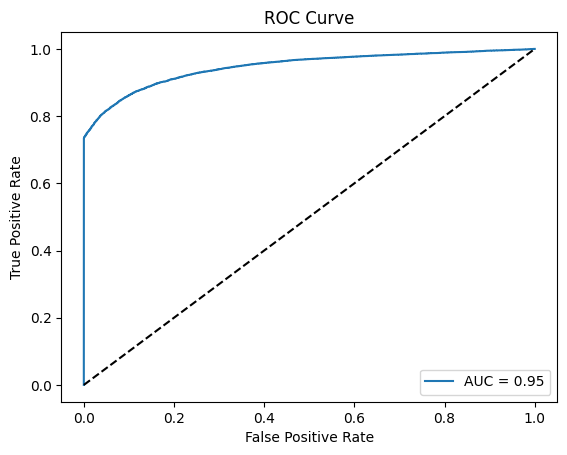

In [ ]:

plot_roc_auc(test['target'],y1_pred)
# plot_roc_auc(test['target'],y2_pred)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Without using Macro Information

In our research we would like to have some data to compare the results of our model without including any of the marco-economic features. This is to verify if there was a difference between the two, and if so, is it to benefit or detriment to keep those features.

In [ ]:
"""
 Like the cell prior, this code creates input and encoding layers for a set of numerical features,
 applies normalization to each feature using the get_normalization_layer function,
 and adds them to lists for later use in a Keras model. However, does not include the 
 macro-economic data.
 
"""

all_inputs = []
encoded_features = []

# Numerical features.
for header in ['loan_amount_000s','applicant_income_000s','number_of_1_to_4_family_units','number_of_owner_occupied_units','tract_to_msamd_income']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [ ]:
"""
 Like the cell prior, this code defines a function that creates a layer for encoding categorical features in a dataset by mapping
 the categories to integer indices, adapting the set of possible values to a fixed integer index,
 and encoding the indices as a one-hot encoded vector. However, does not include the 
 macro-economic data.

"""
categorical_cols = ['property_type', 'agency_code', 'loan_type', 'loan_purpose', 'preapproval',
                    'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
                    'co_applicant_race_1','applicant_sex','co_applicant_sex','purchaser_type','hoepa_status',
                    'lien_status']

for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='int64',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

Here we will create a new instance of the model that was used in our first model

In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)
x_2 = tf.keras.layers.Dense(512, activation="relu")(all_features)
x_2 = tf.keras.layers.Dense(256, activation="tanh")(x_2)

# Add dropout layers to prevent overfitting
x_2 = tf.keras.layers.Dropout(0.5)(x_2)

# Add another dense layer
x_2 = tf.keras.layers.Dense(128, activation="relu")(x_2)

# Add a final dropout layer
x_2 = tf.keras.layers.Dropout(0.3)(x_2)

# Output layer with a linear activation
output = tf.keras.layers.Dense(1)(x_2)
model_no_marcos = tf.keras.Model(all_inputs, output)

model_no_marcos.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryFocalCrossentropy(),
              metrics=["accuracy","FalsePositives","TruePositives","FalseNegatives"])

Now we will train our model

In [ ]:
model_no_marcos.fit(train_ds, epochs=25, validation_data=val_ds,batch_size=15)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['index', 'owner_occupancy', 'state_code', 'county_code', 'census_tract_number', 'population', 'minority_population', 'hud_median_family_income', 'target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


353/353 [==============================] - 9s 15ms/step - loss: 0.1864 - accuracy: 0.8247 - false_positives: 5710.0000 - true_positives: 35077.0000 - false_negatives: 10101.0000 - val_loss: 0.0851 - val_accuracy: 0.8653 - val_false_positives: 0.0000e+00 - val_true_positives: 4077.0000 - val_false_negatives: 1519.0000
Epoch 2/25
353/353 [==============================] - 6s 12ms/step - loss: 0.0836 - accuracy: 0.8665 - false_positives: 3323.0000 - true_positives: 36464.0000 - false_negatives: 8714.0000 - val_loss: 0.0762 - val_accuracy: 0.8661 - val_false_positives: 0.0000e+00 - val_true_positives: 4086.0000 - val_false_negatives: 1510.0000
Epoch 3/25
353/353 [==============================] - 6s 13ms/step - loss: 0.0754 - accuracy: 0.8736 - false_positives: 2850.0000 - true_positives: 36628.0000 - false_negatives: 8550.0000 - val_loss: 0.0738 - val_accuracy: 0.8677 - val_false_positives: 8.0000 - val_true_positives: 4113.0000 - val_false_negatives: 1483.0000
Epoch 4/25
353/353 [=======

Now we will evaluate the results of only including the demographic and microeconomic data

In [ ]:
loss, accuracy,fal_pos,tru_POS,false_negatives = model_no_marcos.evaluate(test_ds)

precision = tru_POS/(tru_POS+fal_pos)
recall = tru_POS/(tru_POS+false_negatives)
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall",recall)
print("F1",(2*(precision*(recall))/(precision+recall)))

45/45 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.8868 - false_positives: 203.0000 - true_positives: 4521.0000 - false_negatives: 1073.0000
Accuracy 0.8868192434310913
Precision 0.9570279424216765
Recall 0.8081873435824097
F1 0.8763326226012793


In [ ]:
y2_pred = model_no_marcos.predict(test_ds)

45/45 [==============================] - 1s 6ms/step


In [ ]:
import pickle

In [ ]:
with open('y1_pred.pkl', 'rb') as f:
    y1_pred = pickle.load(f)
    f.close()


# Plot AUC-ROC

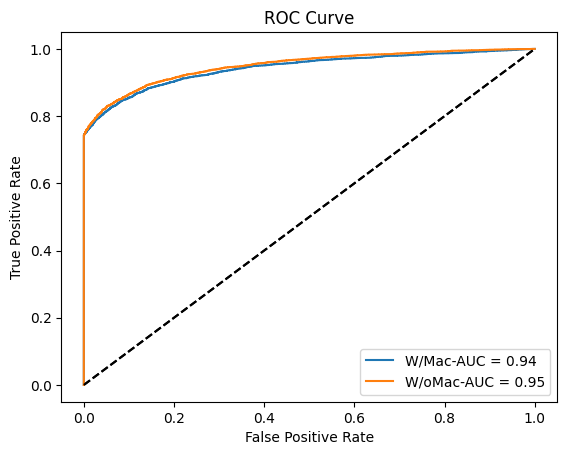

In [ ]:

plot_roc_auc(test['target'],y1_pred,'W/Mac-')
plot_roc_auc(test['target'],y2_pred,'W/oMac-')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Without Demographic Data

In [ ]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['loan_amount_000s','applicant_income_000s','number_of_1_to_4_family_units','number_of_owner_occupied_units','tract_to_msamd_income']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

categorical_cols = ['property_type', 'agency_code', 'loan_type', 'loan_purpose', 'preapproval','purchaser_type','hoepa_status',
                    'lien_status']

for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='int64',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-24e9bc81db11>", line 7, in <cell line: 5>
    normalization_layer = get_normalization_layer(header, train_ds)
  File "<ipython-input-11-fbc21a988003>", line 9, in get_normalization_layer
    normalizer.adapt(feature_ds)
  File "/usr/local/lib/python3.9/dist-packages/keras/layers/preprocessing/normalization.py", line 286, in adapt
    super().adapt(data, batch_size=batch_size, steps=steps)
  File "/usr/local/lib/python3.9/dist-packages/keras/engine/base_preprocessing_layer.py", line 258, in adapt
    self._adapt_function(iterator)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/eager/polymorphic_function/pol

TypeError: ignored

In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(512, activation="relu")(all_features)
x = tf.keras.layers.Dense(256, activation="tanh")(x)

# Add dropout layers to prevent overfitting
x = tf.keras.layers.Dropout(0.5)(x)

# Add another dense layer
x = tf.keras.layers.Dense(128, activation="relu")(x)

# Add a final dropout layer
x = tf.keras.layers.Dropout(0.3)(x)

# Output layer with a linear activation
output = tf.keras.layers.Dense(1)(x)
model_no_demo = tf.keras.Model(all_inputs, output)

model_no_demo.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=["accuracy","FalsePositives","TruePositives","FalseNegatives"])

In [ ]:
model_no_demo.fit(train_ds, epochs=25, validation_data=val_ds,batch_size=15)

In [ ]:
loss, accuracy,fal_pos,tru_POS,false_negatives = model_no_demo.evaluate(test_ds)
print("Accuracy", accuracy)
# print("Cate Accuracy",cate_accuracy)
# print("Cate Accur", cate)
print("Precision", tru_POS/(tru_POS+fal_pos))
print("Recall",tru_POS/(tru_POS+false_negatives))
print("F1",2*((tru_POS/(tru_POS+fal_pos))*(tru_POS/(tru_POS+false_negatives)))/((tru_POS/(tru_POS+fal_pos))+(tru_POS/(tru_POS+false_negatives))))

In [ ]:
df.iloc[-1][6:]

loan_amount_000s                    580
preapproval                           3
state_code                            6
county_code                          73
census_tract_number                 200
applicant_ethnicity                   1
co_applicant_ethnicity                1
applicant_race_1                      5
co_applicant_race_1                   5
applicant_sex                         1
co_applicant_sex                      2
applicant_income_000s               179
purchaser_type                        0
hoepa_status                          2
lien_status                           1
population                        13672
minority_population                  36
hud_median_family_income          79300
tract_to_msamd_income               152
number_of_owner_occupied_units     3503
number_of_1_to_4_family_units      4055
target                                1
Name: 185133, dtype: int64

In [ ]:
sample = {
    'agency_code': 4,
    'loan_type': 3,
    'property_type': 1,
    'loan_purpose': 1,
    'loan_amount_000s': 170,
    'preapproval': 3,
    'state_code': 6,
    'county_code': 73,
    'census_tract_number': 200,
    'applicant_ethnicity': 2,
    'co_applicant_ethnicity': 2,
    'applicant_race_1': 2,
    'co_applicant_race_1': 2,
    'applicant_sex':1,
    'co_applicant_sex':1,
    'applicant_income_000s':57,
    'hoepa_status':2,
    'lien_status':1,
    'population':13672,
    'minority_population':36,
    'hud_median_family_income':79300,
    'tract_to_msamd_income':152,
    'number_of_1_to_4_family_units':4055,
    'number_of_owner_occupied_units':3503
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)
prob = tf.nn.sigmoid(predictions[0])

print(
    "This applicant has a %.1f percent probability "
    "of getting approved." % (100 * prob)
)
#I dont think this works!

1/1 [==============================] - 0s 47ms/step
This applicant has a 65.3 percent probability of getting approved.
